In [1]:
%matplotlib notebook
#%load_ext autoreload
#%autoreload 2

import os
import seaborn as sns
import sys
sys.path.append(os.path.join(os.getcwd(), "src"))

import util.io as mio
import util.plotting as mplot
from model.conversationDataframe import ConversationDataframe
from stats.iConvStats import IConvStats

In [2]:
#Set this var to point to your conversation file. You can use my conversations examples for testing
FILEPATH = "src/resources/unittest/test_plotting.txt"

In [3]:
conv = ConversationDataframe(FILEPATH)
conv.loadMessages()

### **Basic length stats**

In [4]:
basicLengthStats = conv.stats.generateStats(IConvStats.STATS_NAME_BASICLENGTH)
basicLengthStats

,numMsgs,lenMsgs,avgLen
sender,,,
s1,984,49352,50.154472
s2,1016,49086,48.312992
total,2000,98438,49.219000


<IPython.core.display.Javascript object>


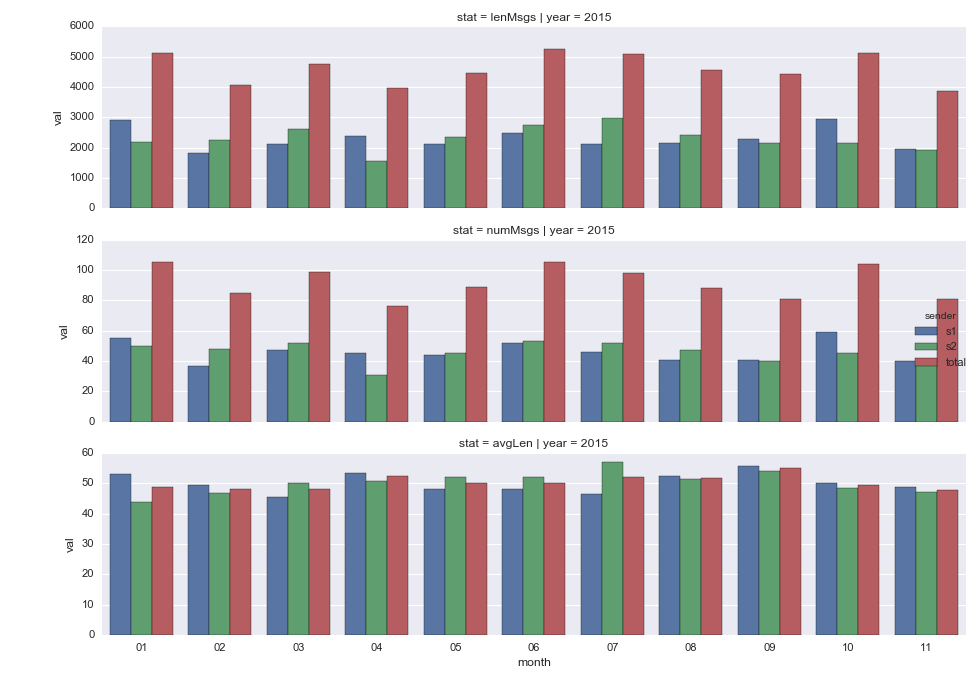

In [5]:
data = conv.stats.generateStatsByYearAndMonth(IConvStats.STATS_NAME_BASICLENGTH)
#data = data[data.sender != 'total']
mplot.plotBasicLengthStatsByYearAndMonth(data, ['2015'])

<IPython.core.display.Javascript object>


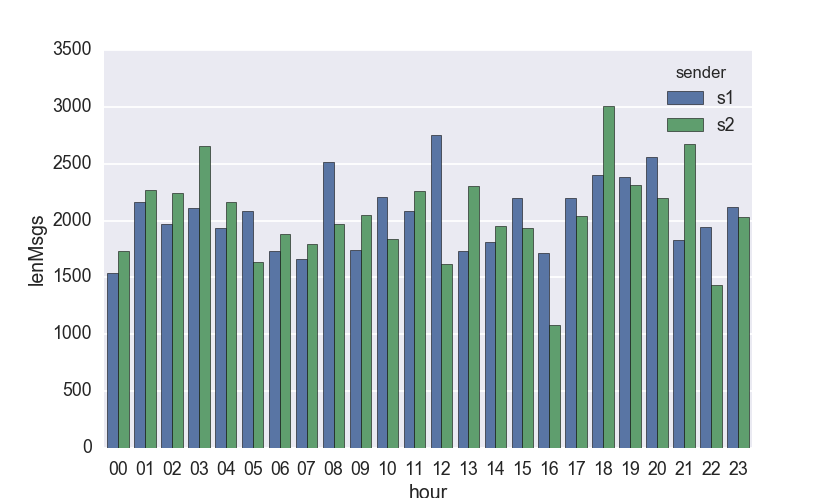

In [6]:
data = conv.stats.generateStatsByHour(IConvStats.STATS_NAME_BASICLENGTH)
data = data[data.sender != 'total']
mplot.plotSingleBasicLengthStatByHour(data, 'lenMsgs')

<IPython.core.display.Javascript object>


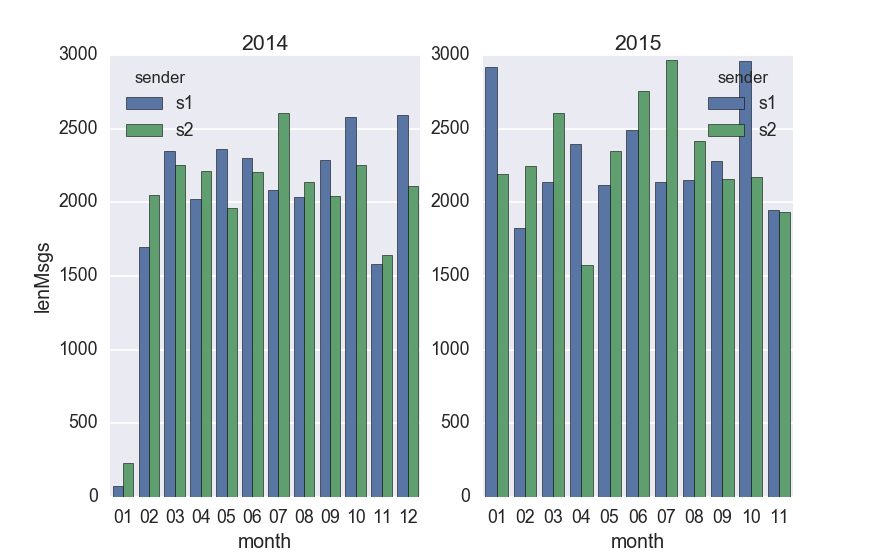

In [7]:
data = conv.stats.generateStatsByYearAndMonth(IConvStats.STATS_NAME_BASICLENGTH)
data = data[data.sender != 'total']
mplot.plotSingleBasicLengthStatByYearAndMonth(data, 'lenMsgs')

<IPython.core.display.Javascript object>


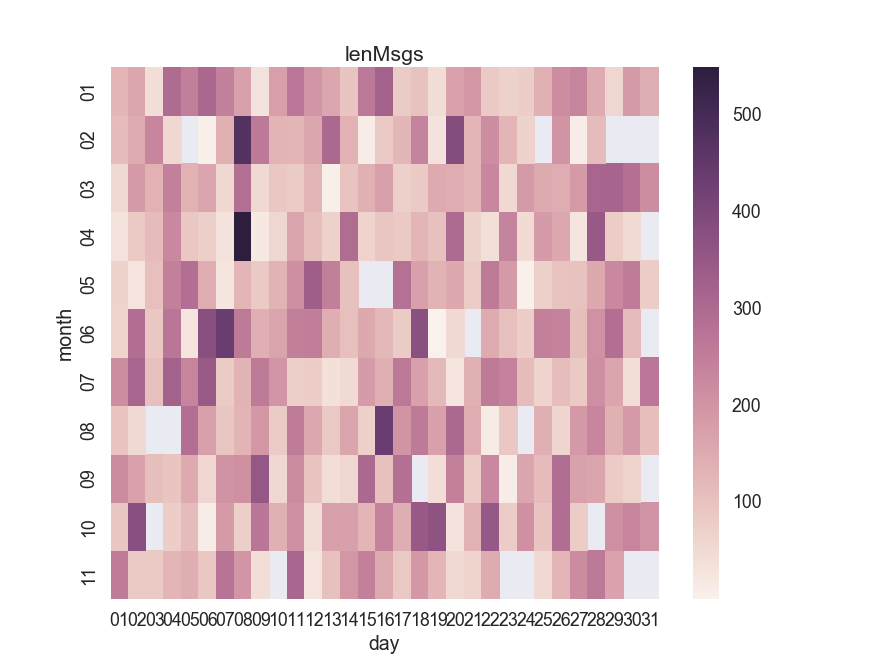

In [8]:
data = conv.stats.generateStatsByYearMonthDay(IConvStats.STATS_NAME_BASICLENGTH)
data = data.loc[data['sender'] == 'total']
mplot.plotSingleBasicLengthStatHeatmap(data, 'lenMsgs', ['2015'])

### Interval Stats

In [9]:
start, end, interval = conv.stats.getIntervalStats()
days = conv.stats.getDaysWithoutMessages()
print("Conversation started: {}".format(str(start)))
print("Conversation ended: {}".format(str(end)))
print("Conversation overall duration: {}".format(interval))

print("{:.0f} days without messages".format(len(days)))
percentage = (len(days)/(interval.days+1))*100
print("{0:.2f}% out of the conversation overall days-interval".format(percentage))

Conversation started: 2014-01-30 17:58:04
Conversation ended: 2015-11-29 19:58:14
Conversation overall duration: 668 days 02:00:10
29 days without messages
4.33% out of the conversation overall days-interval


### Lexical Stats

In [10]:
lexicalStats = conv.stats.generateStats(IConvStats.STATS_NAME_LEXICAL)
lexicalStats

,tokensCount,vocabularyCount,lexicalRichness
sender,,,
s1,8853,2575,0.290862
s2,8702,2638,0.303149
total,17555,5213,0.296952


<IPython.core.display.Javascript object>


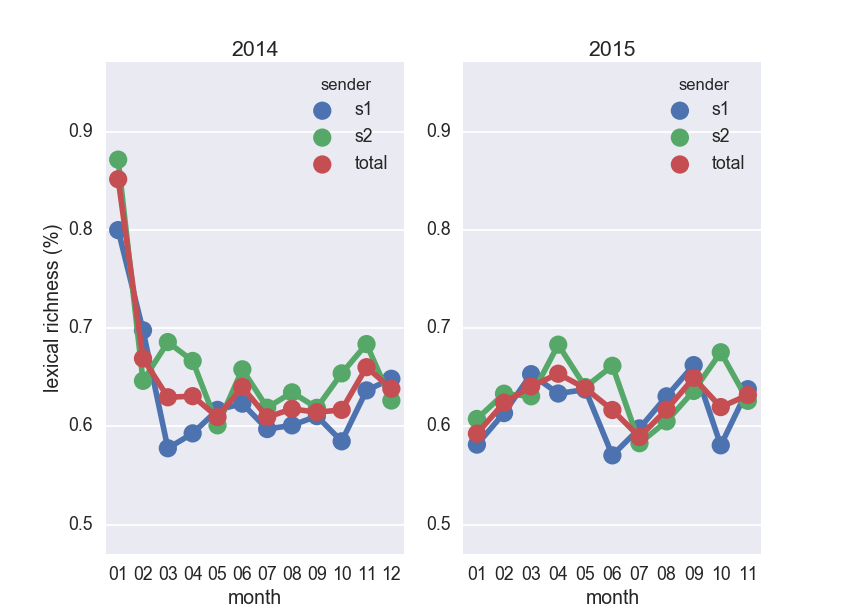

In [11]:
data = conv.stats.generateStatsByYearAndMonth(IConvStats.STATS_NAME_LEXICAL)
mplot.plotRichnessVariation(data)

### Words Count

In [12]:
#filepath = conv.statsFolder + '\\' + 'wordCount.txt'
stats = conv.stats.generateStats(IConvStats.STATS_NAME_WORDCOUNT)
stats.head()
#mio.printDataFrameToFile(stats, filepath)

,count,sender,total,frequency,inverseSenderFrequency,tf-isf
word,,,,,,
the,707,s1,1413,0.500354,0.0,0.0
and,358,s1,693,0.516595,0.0,0.0
of,311,s1,589,0.528014,0.0,0.0
i,224,s1,397,0.564232,0.0,0.0
to,150,s1,307,0.488599,0.0,0.0


<IPython.core.display.Javascript object>


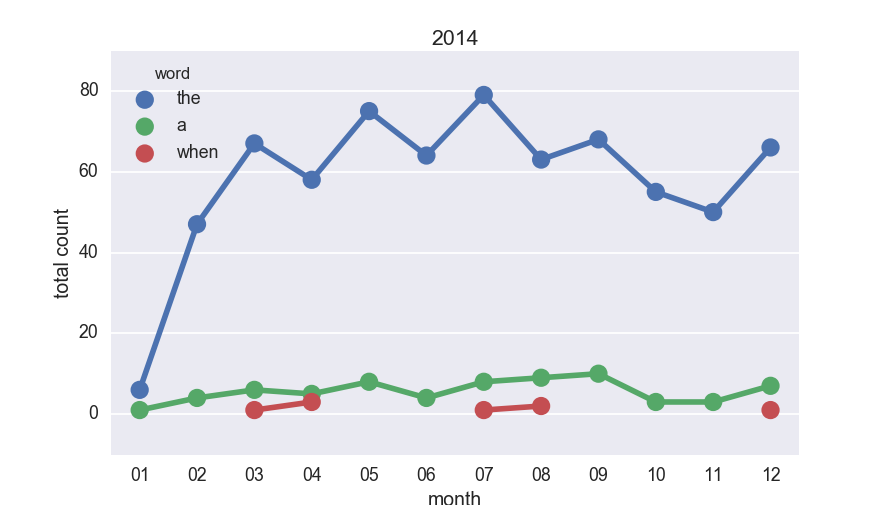

In [13]:
words = ['the', 'hello', 'a', 'when']
data = conv.stats.generateStatsByYearAndMonth(IConvStats.STATS_NAME_WORDCOUNT)
data = data.reset_index()
mplot.plotWordsUsage(data, words, ['2014'])

### Words Used just by

In [18]:
#mio.printWordsUsedJustByToFile(conv)

### Emoticons Stats

In [14]:
stats = conv.stats.generateStats(IConvStats.STATS_NAME_EMOTICONS)
stats
#mio.printEmoticonsStats(stats)

,numEmoticons,emoticonsRatio,lenMsgs
sender,,,
s1,58,0.001152,50335
s2,63,0.001257,50101
total,121,0.001205,100436
